fixed_point: (-1.0000000000000002, -4.440892098500626e-16)


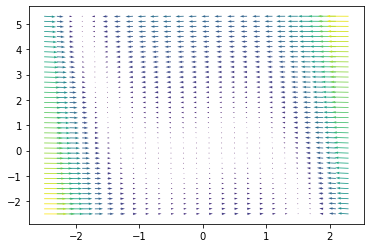

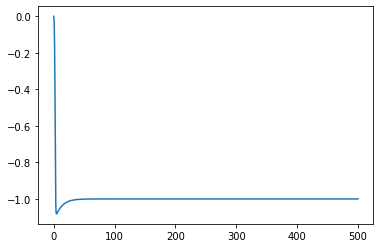

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

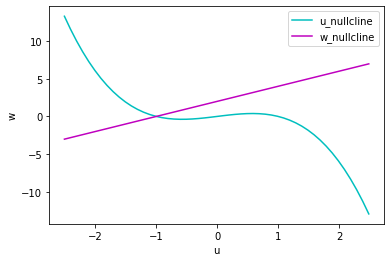

In [5]:
plt.figure()
u_axes = np.arange(-2.51, 2.51, .1)
u_nullclines = u_axes*(1-u_axes**2)
w_nullclines = 2*u_axes+2
plt.plot(u_axes, u_nullclines, color='c', label='u_nullcline')
plt.plot(u_axes, w_nullclines, color='m', label='w_nullcline')
plt.xlabel('u')
plt.ylabel('w')
plt.legend()
plt.show()

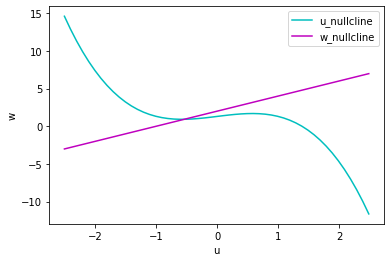

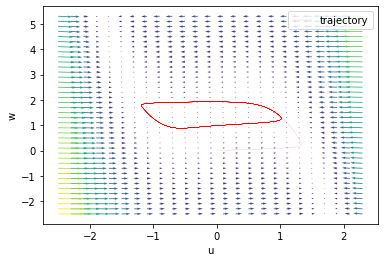

In [9]:
t, u, w = fitzhugh_nagumo.get_trajectory(v0=0, w0=0, I_ext=1.3)
plt.figure()
u_axes = np.arange(-2.51, 2.51, .1)
u_nullclines = u_axes*(1-u_axes**2)+1.3
w_nullclines = 2*u_axes+2
plt.plot(u_axes, u_nullclines, color='c', label='u_nullcline')
plt.plot(u_axes, w_nullclines, color='m', label='w_nullcline')
plt.xlabel('u')
plt.ylabel('w')
plt.legend()
plt.show()

plt.figure()
fitzhugh_nagumo.plot_flow(I_ext=1.3)
plt.plot(u, w, color='r', label='trajectory', linewidth=0.2)
plt.xlabel('u')
plt.ylabel('w')
plt.legend()
plt.show()

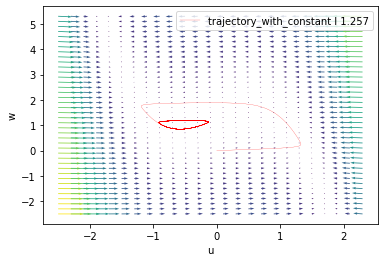

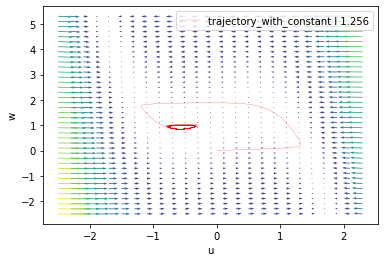

In [23]:
def plot_trajectory_inflow(i):
    t, u, w = fitzhugh_nagumo.get_trajectory(v0=0, w0=0, I_ext=i)
    plt.figure()
    fitzhugh_nagumo.plot_flow(I_ext=i)
    plt.plot(u, w, color='r', label='trajectory_with_constant I {}'.format(i), linewidth=0.2)
    plt.xlabel('u')
    plt.ylabel('w')
    plt.legend()
    plt.show()

plot_trajectory_inflow(1.258)
plot_trajectory_inflow(1.257)

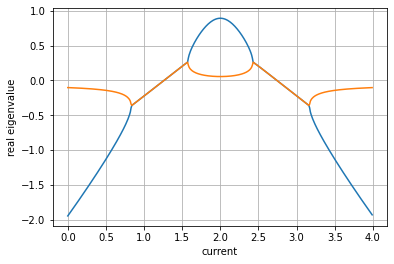

[0.00080489+0.31211995j 0.00080489-0.31211995j]
[-0.00785325+0.31340653j -0.00785325-0.31340653j]


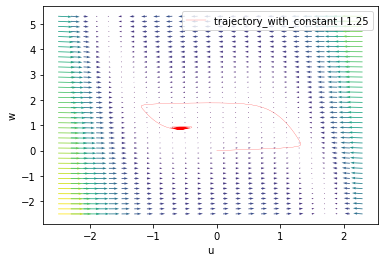

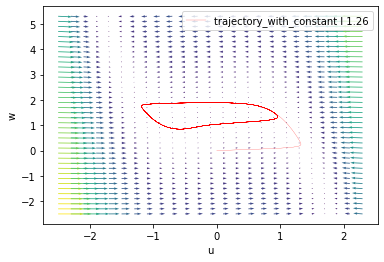

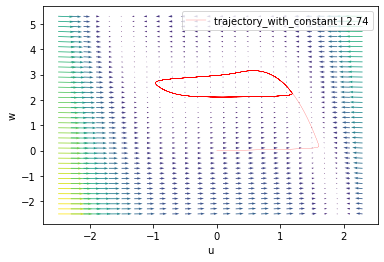

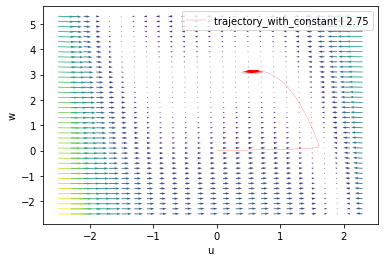

In [32]:
def get_jacobian(u_0, w_0):
    return [[1-3*(u_0**2), -1], [0.1, -0.05]]

def get_eigenvalue(i):
    u_0, w_0 = fitzhugh_nagumo.get_fixed_point(I_ext=i)
    return np.linalg.eigvals(get_jacobian(u_0, w_0))

currents = np.arange(0, 4, .01)
e1s, e2s = [], []
for i in currents:
    e1, e2 = get_eigenvalue(i)
    e1s.append(e1.real)
    e2s.append(e2.real)

plt.figure()
plt.plot(currents, e1s)
plt.plot(currents, e2s)
plt.xlabel('current')
plt.ylabel('real eigenvalue')
plt.grid()
plt.show()
print(get_eigenvalue(1.26))
print(get_eigenvalue(1.25))
plot_trajectory_inflow(1.25)
plot_trajectory_inflow(1.26)
plot_trajectory_inflow(2.74)
plot_trajectory_inflow(2.75)